# Imports

In [3]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 50)
pd.options.display.max_colwidth = 500
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))

import matplotlib.pyplot as plt
import seaborn as sns
#Plot output
%matplotlib inline
plt.rcParams['figure.figsize'] = [18,10]
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'

#Booking.com palette (Hex)
c15 = ['#003580', '#009fe3', '#feba02', '#D9958D', '#00C4CC', '#77A0D9', '#8CB811', '#F57D00', '#4A8594', '#D52685', '#CE1126', '#553A99', '#D9958D','#0EA013', '#8283FA']

#Booking.com settings Seaborn
sns.set(rc={'axes.facecolor':'#f2f6fa', 'figure.facecolor':'#f2f6fa'})
sns.set_palette(sns.color_palette(c15))

#Quality of life
from IPython.display import display
pd.set_option('colheader_justify', 'left')
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
%precision %.2f
%precision 2

import warnings
warnings.filterwarnings('ignore')

#Importing the auxiliar and preprocessing librarys 
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, MiniBatchKMeans

from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, Ridge, SGDRegressor
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding, ExtraTreesRegressor

from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb





from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Data

In [4]:
df = pd.read_csv('Booking_features.csv')

In [5]:
df.head(3)

,Team,Country,R_word_count,R_char_count,R_word_density,R_punc_count,Job Description - Cleaned,C_word_count,C_char_count,C_word_density,...,Leadership,Legal & Public Affairs,Marketing & Communications,People,Product,Security & Infrastructure,Score,Score_median,Score_max,Category
0,Engineering,United Kingdom,962,5727,0.17,161,booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact missio...,613,4360,0.14,...,10,2,2,11,9,10,114,9.00,18,Engineer
1,Design & User Experience,Netherlands,687,3757,0.18,77,booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people make easy everyone experience world look ux copywriter join write team marketing support business travel department close-knit write community make around 15 writer creative copywriter ux writer collaborate across product integrate marketing campaign goal deliver sea...,401,2740,0.15,...,6,1,10,6,9,0,73,5.50,10,UX
2,Finance,Netherlands,833,5203,0.16,106,booking.com global treasury team look treasury risk management professional join grow team treasury risk specialist responsible perform financial analysis operating process relate identification quantification management reporting credit counterparty liquidity treasury risk typology attach book evolve business model strategic initiative third party relationship individual form integral part treasury risk team reporting treasury manager function prefer candidate accustom work fast pace enviro...,562,4099,0.14,...,6,4,6,7,7,4,94,6.50,14,Specialist


# Initial predictions - Only TEXT

### Encoding Categorical Column Team

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Team'])
#X = df.loc[:,['Job Description - Cleaned']]
X = df['Job Description - Cleaned']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(522,)
(522,)
(131,)
(131,)


### Vectorizing tfidf

In [9]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 2),
    token_pattern=r'\w{2,}',
    max_df=.75,
    min_df=0.01
    )

# fit and transform on it the training features
word_vectorizer.fit(X_train)
X_train = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
X_test = word_vectorizer.transform(X_test)

## Logistic Regression

In [10]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)# Use accuracy_score function to get the accuracy
print('Logistic Regression Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

Logistic Regression Accuracy Score: 0.7481


### Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

Random Forest Accuracy Score: 0.8015


### KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', n_jobs=-1, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)# Use accuracy_score function to get the accuracy
print('KNN Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

KNN Accuracy Score: 0.8397


In [207]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
knn=KNeighborsClassifier() 

# declare parameters for hyperparameter tuning
parameters = [ {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}
              ]

knn_grid_search = GridSearchCV(estimator = knn,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

knn_grid_search.fit(X_train, y_train);

print('Estimator chosen by the gridsearch :',knn_grid_search.best_estimator_)
print('GridSearch CV score on test set: {0:0.4f}'.format(knn_grid_search.score(X_test, y_test)))

Estimator chosen by the gridsearch : KNeighborsClassifier(n_neighbors=1)
GridSearch CV score on test set: 0.8092


### SVM

In [14]:
s = SVC(kernel='linear',C=10,random_state=42)
s.fit(X_train, y_train)# predict the labels on validation dataset
y_pred = s.predict(X_test)# Use accuracy_score function to get the accuracy
print('SVM Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

SVM Accuracy Score: 0.8626


In [208]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03]} 
              ]

svm_grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

svm_grid_search.fit(X_train, y_train);

print('Estimator chosen by the gridsearch :',svm_grid_search.best_estimator_)
print('GridSearch CV score on test set: {0:0.4f}'.format(svm_grid_search.score(X_test, y_test)))

Estimator chosen by the gridsearch : SVC(C=10, kernel='linear')
GridSearch CV score on test set: 0.8626



Comments

Our original model test accuracy is 0.8626 while GridSearch CV score on test-set is 0.8626.

So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.

Here, we should not confuse best_score_ attribute of grid_search with the score method on the test-set.

The score method on the test-set gives the generalization performance of the model. Using the score method, we employ a model trained on the whole training set.

The best_score_ attribute gives the mean cross-validation accuracy, with cross-validation performed on the training set.



***

In [15]:
kfold = StratifiedKFold(n_splits=10)

In [16]:
SEED = 42

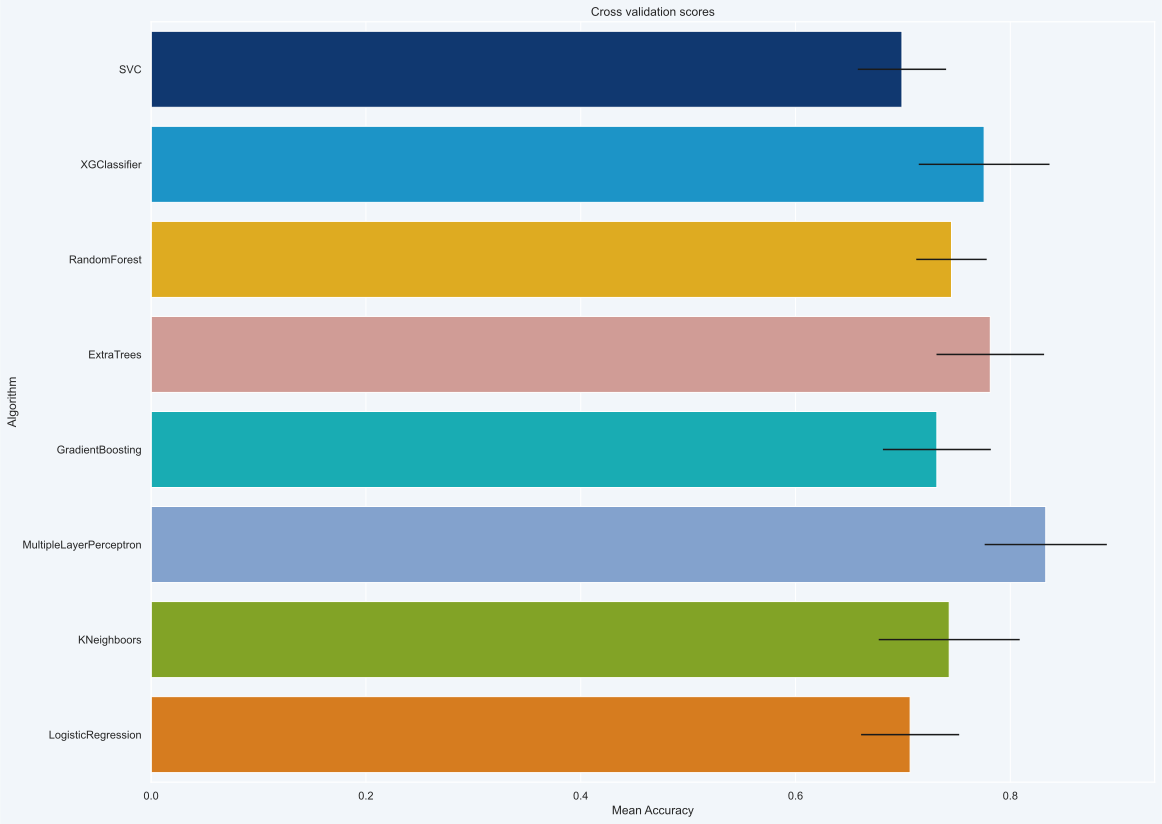

In [17]:
# Modeling step Test differents algorithms 
classifiers = []
classifiers.append(SVC(random_state=SEED))
classifiers.append(XGBClassifier(n_estimators=100, random_state=SEED))
classifiers.append(RandomForestClassifier(random_state=SEED))
classifiers.append(ExtraTreesClassifier(random_state=SEED))
classifiers.append(GradientBoostingClassifier(random_state=SEED))
classifiers.append(MLPClassifier(random_state=SEED))
classifiers.append(KNeighborsClassifier(random_state=SEED))
classifiers.append(LogisticRegression(random_state = SEED))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = 'accuracy', cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors': cv_std,'Algorithm':['SVC','XGClassifier',
'RandomForest','ExtraTrees','GradientBoosting','MultipleLayerPerceptron','KNeighboors','LogisticRegression']})

fig = plt.figure(figsize=(18,14))

g = sns.barplot('CrossValMeans','Algorithm',data = cv_res, orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

## Hyperparameter tunning for best models

In [ ]:
#XGBoostClassifier
XGBC = XGBClassifier(random_state=SEED)

#Search grid for optimal parameters
xgbc_param_grid = { 'n_estimators': [100, 200, 500],
                    'learning_rate': [0.01,0.05,0.1],
                    'booster': ['gbtree', 'gblinear'],
                    'gamma': [0, 0.5, 1],
                    'reg_alpha': [0, 0.5, 1],
                    'reg_lambda': [0.5, 1, 5],
                    'base_score': [0.2, 0.5, 1]
                  }

gsXGBC = GridSearchCV(XGBC,param_grid = xgbc_param_grid, cv=kfold, scoring='accuracy', n_jobs= -1, verbose = 1)

gsXGBC.fit(X_train,y_train)

gsXGBC_best = gsXGBC.best_estimator_

#Best score
gsXGBC.best_score_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [ ]:
#ExtraTrees 
ETC = ExtraTreesClassifier()

## Search grid for optimal parameters
etc_param_grid = {'max_depth': [None],
                  'max_features': [1, 3, 10],
                  'min_samples_split': [2, 3, 10],
                  'min_samples_leaf': [1, 3, 10],
                  'bootstrap': [False],
                  'n_estimators' :[100,300],
                  'criterion': ['gini']
                 }

gsETC = GridSearchCV(ETC,param_grid = etc_param_grid, cv=kfold, scoring='accuracy', n_jobs= -1, verbose = 1)

gsETC.fit(X_train,y_train)

ETC_best = gsETC.best_estimator_

#Best score
gsETC.best_score_

In [ ]:
#MultiLater Perceptron 
MLPC = MLPClassifier()

## Search grid for optimal parameters
mlpc_param_grid = { 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05],
                    'learning_rate': ['constant','adaptive']
                  }

gsMLPC = GridSearchCV(MLPC,param_grid = mlpc_param_grid, cv=kfold, scoring='accuracy', n_jobs= -1, verbose = 1)

gsMLPC.fit(X_train,y_train)

MLPC_best = gsETC.best_estimator_

#Best score
gsMLPC.best_score_

In [ ]:
#K-Nearest Neighbors
KNN = KNeighborsClassifier()

## Search grid for optimal parameters
knn_param_grid = {  'n_neighbors':list(range(1,15,1)),
                    'leaf_size':list(range(1,50,5))
                 }

gsKNN = GridSearchCV(KNN,param_grid = knn_param_grid, cv=kfold, scoring='accuracy', n_jobs= -1, verbose = 1)

gsKNN.fit(X_train,y_train)

KNN_best = gsETC.best_estimator_

#Best score
gsKNN.best_score_

In [144]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = 'PCA decomposition'  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = 't-SNE decomposition' 

    else:
        return 'Error'
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        '0': 'business intelligence',
        '1': 'data analyst',
        '2': 'data engineer',
        '3': 'data scientist',
        '4': 'full stack developer'
    }
    
    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.set_palette('hls', 5)
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue='label_name', 
                    data=df_full,
                    #palette=['red', 'orange', 'darkgreen', 'blue', 'purple'],
                    alpha=.7).set_title(title);

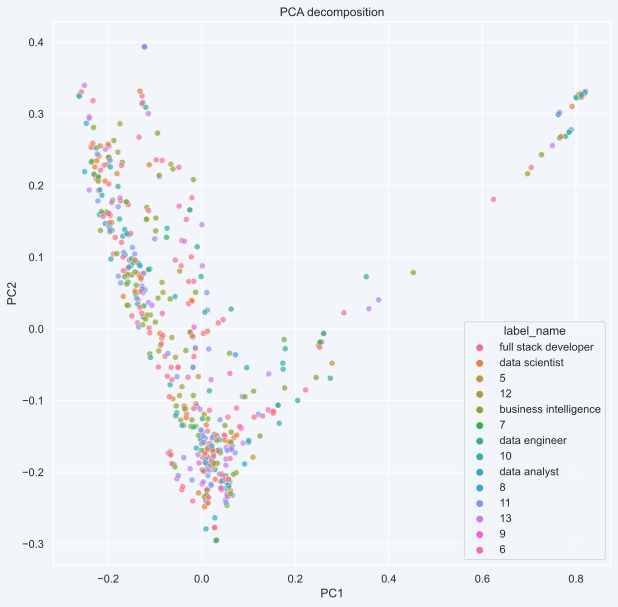

In [211]:
plot_dim_red('PCA', features=X_train.toarray(), labels=y, n_components=2)

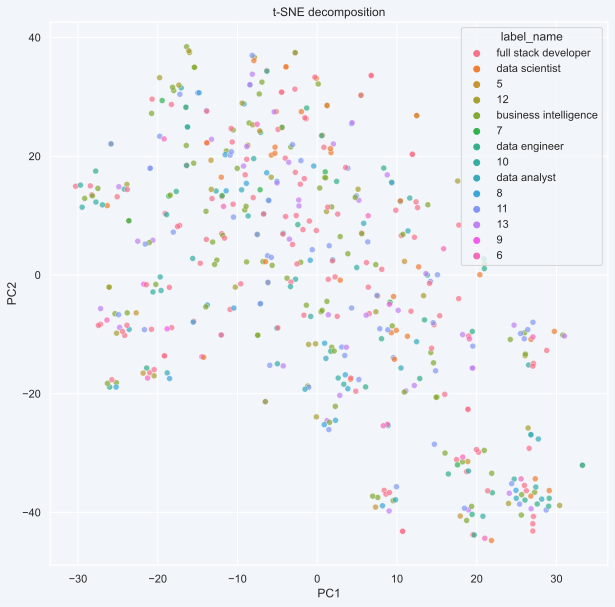

In [146]:
plot_dim_red('TSNE', features=X_train.toarray(), labels=y, n_components=2)

# Features

In [233]:
print(df.dtypes)
print('\nShape:',df.shape)

Job Title                     object
Job Description               object
Location                      object
Team                          object
Country                       object
R_word_count                   int64
R_char_count                   int64
R_word_density               float64
R_punc_count                   int64
Job Description - Cleaned     object
C_word_count                   int64
C_char_count                   int64
C_word_density               float64
C_punc_count                   int64
Team_kmeans                    int32
dtype: object

Shape: (653, 15)


In [234]:
print(df_team.dtypes)
print('\nShape:',df_team.shape)

Job Title                          object
Job Description - Cleaned          object
Business Development & Support      int64
Customer Service                    int64
Data Science & Analytics            int64
Design & User Experience            int64
Engineering                         int64
Finance                             int64
Finance & Legal                     int64
IT Services                         int64
Leadership                          int64
Legal & Public Affairs              int64
Marketing & Communications          int64
People                              int64
Product                             int64
Security & Infrastructure           int64
Score                               int64
Score_median                      float64
Score_max                           int64
dtype: object

Shape: (653, 19)


In [702]:
frames = [df.drop(columns=['Job Description', 'Location','Team_kmeans']),df_team.drop(columns=['Job Title', 'Job Description - Cleaned'])]
df_total = pd.concat(frames, axis=1).reset_index(drop=True)

In [703]:
df_total.head(1)

,Job Title,Team,Country,R_word_count,R_char_count,R_word_density,R_punc_count,Job Description - Cleaned,C_word_count,C_char_count,...,IT Services,Leadership,Legal & Public Affairs,Marketing & Communications,People,Product,Security & Infrastructure,Score,Score_median,Score_max
0,Junior Endpoints Engineer,Engineering,United Kingdom,962,5727,0.17,161,booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact missio...,613,4360,...,18,10,2,2,11,9,10,114,9.00,18


In [625]:
print(df_total.dtypes)
print('\nShape:',df_total.shape)

Job Title                          object
Team                               object
Country                            object
R_word_count                        int64
R_char_count                        int64
R_word_density                    float64
R_punc_count                        int64
Job Description - Cleaned          object
C_word_count                        int64
C_char_count                        int64
C_word_density                    float64
C_punc_count                        int64
Team_kmeans                         int32
Business Development & Support      int64
Customer Service                    int64
Data Science & Analytics            int64
Design & User Experience            int64
Engineering                         int64
Finance                             int64
Finance & Legal                     int64
IT Services                         int64
Leadership                          int64
Legal & Public Affairs              int64
Marketing & Communications        

### Reducing cardinality

Both Job Title and Country have a high amount of non-numeric unique values. In order to make use of these columns in our model we need to reduce cardinality and encode them to numeric values.

In [626]:
df_total['Job Title'].nunique() #Number of unique values

630

In [704]:
#Create simple dictionary of categories
d = {
    'Manager': ['Manager'],
    'Data Scientist': ['Scientist'],
    'Data Analyst': ['Analyst'],
    'ML': ['Machine'],
    'Engineer': ['Engineer'],
    'Developer': ['Developer'],
    'Accounts': ['Account'],
    'Recruiter': ['Recruiter'],
    'UX': ['UX'],
    'Specialist': ['Specialist'],
    'Sales': ['Commercial'],
    'Lead': ['Lead'],
    'Customer Relations': ['Customer'],
    'Finance': ['Business']
    }

#Create Category column with default value of Other
df_total['Category'] = 'Other'

#Loop through dictionary
for k, v in d.items():
    pat = '' ''.join(v)
    mask = df_total['Job Title'].str.contains(pat, case=False)

    df_total.loc[mask, 'Category'] = k #Replace value with key from dictionary if substring occurs

In [705]:
df_total['Category'].nunique() #Number of unique values after replacing values

15

In [706]:
df_total = df_total.drop(columns='Job Title') #Drop Job Title column as it's replaced by Category

In [707]:
df_total.dtypes

Team                               object
Country                            object
R_word_count                        int64
R_char_count                        int64
R_word_density                    float64
R_punc_count                        int64
Job Description - Cleaned          object
C_word_count                        int64
C_char_count                        int64
C_word_density                    float64
C_punc_count                        int64
Business Development & Support      int64
Customer Service                    int64
Data Science & Analytics            int64
Design & User Experience            int64
Engineering                         int64
Finance                             int64
Finance & Legal                     int64
IT Services                         int64
Leadership                          int64
Legal & Public Affairs              int64
Marketing & Communications          int64
People                              int64
Product                           

In [631]:
df_total['Country'].nunique()

37

In [708]:
countries = df_total['Country'].value_counts().index.tolist()

df_total['Country'] = np.where(df_total['Country'].isin(countries[:14]), df_total['Country'], 'Other')

In [709]:
df_total['Country'].nunique()

15

## Declaring X / y

In [986]:
X = df_total.iloc[:,1:]
y = df_total.iloc[:, 0]

In [987]:
X

,Country,R_word_count,R_char_count,R_word_density,R_punc_count,Job Description - Cleaned,C_word_count,C_char_count,C_word_density,C_punc_count,...,Leadership,Legal & Public Affairs,Marketing & Communications,People,Product,Security & Infrastructure,Score,Score_median,Score_max,Category
0,United Kingdom,962,5727,0.17,161,booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact missio...,613,4360,0.14,23,...,10,2,2,11,9,10,114,9.00,18,Engineer
1,Netherlands,687,3757,0.18,77,booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people make easy everyone experience world look ux copywriter join write team marketing support business travel department close-knit write community make around 15 writer creative copywriter ux writer collaborate across product integrate marketing campaign goal deliver sea...,401,2740,0.15,13,...,6,1,10,6,9,0,73,5.50,10,UX
2,Netherlands,833,5203,0.16,106,booking.com global treasury team look treasury risk management professional join grow team treasury risk specialist responsible perform financial analysis operating process relate identification quantification management reporting credit counterparty liquidity treasury risk typology attach book evolve business model strategic initiative third party relationship individual form integral part treasury risk team reporting treasury manager function prefer candidate accustom work fast pace enviro...,562,4099,0.14,12,...,6,4,6,7,7,4,94,6.50,14,Specialist
3,United Kingdom,1155,6526,0.18,116,company long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission un...,704,4868,0.14,19,...,9,3,3,10,12,4,114,8.00,15,Manager
4,United Kingdom,549,2923,0.19,53,account executive bristol full time position base amaze manchester office company long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment bel...,288,1986,0.14,11,...,4,1,3,5,4,1,53,4.00,9,Accounts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Netherlands,679,3865,0.18,105,long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission united bel...,393,2814,0.14,25,...,10,3,2,5,7,8,81,6.50,10,Finance
649,United Kingdom,735,3760,0.20,71,senior front end developer booking.com make easy everyone experienc

### Label Encoding

In [988]:
enc_le = LabelEncoder()
y = enc_le.fit_transform(y)

### One-Hot Encoding

In [989]:
enc_ohe = OneHotEncoder(sparse=False)
X_1=X
columns=['Category', 'Country']

for col in columns:

   df_cat=X[[col]].append(X[[col]])
   enc_ohe.fit(df_cat)

   temp = enc_ohe.transform(X[[col]])

   temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in df_cat[col]
        .value_counts().index])


   temp=temp.set_index(X.index.values)

   X=pd.concat([X_1,temp],axis=1)
X.drop(columns=columns, inplace=True)

### Split

In [991]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [992]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(522, 41)
(522,)
(131, 41)
(131,)


### TF-IDF Vectorization

In [993]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 2),
    token_pattern=r'\w{2,}',
    max_df=.75,
    min_df=0.01,
    )

# fit and transform on it the training features
word_vectorizer.fit(X_train['Job Description - Cleaned'])
X_train_word_features = word_vectorizer.transform(X_train['Job Description - Cleaned'])

#transform the test features to sparse matrix
X_test_word_features = word_vectorizer.transform(X_test['Job Description - Cleaned'])

In [994]:
df1 = pd.DataFrame(X_train_word_features.toarray(), columns=word_vectorizer.get_feature_names()) #Create temporary df from sparse matrix of TF-IDF vectors
df1.index = X_train.index #Set index to be equal
X_train = pd.concat([X_train, df1], axis=1) #Contact dataframes
X_train.drop(columns='Job Description - Cleaned', inplace=True) #Drop original text column

df2 = pd.DataFrame(X_test_word_features.toarray(), columns=word_vectorizer.get_feature_names())
df2.index = X_test.index
X_test = pd.concat([X_test, df2], axis=1) #Contact dataframes
X_test.drop(columns='Job Description - Cleaned', inplace=True) #Drop original text column

print(X_train.shape)
print(X_test.shape)

(522, 10011)
(131, 10011)


***

### Scaling

In [864]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [928]:
X_train.iloc[:,:24] = sc.fit_transform(X_train.iloc[:,:24])
X_test.iloc[:,:24] = sc.fit_transform(X_test.iloc[:,:24])

In [937]:
X_train.iloc[:,:24]

,R_word_count,R_char_count,R_word_density,R_punc_count,C_word_count,C_char_count,C_word_density,C_punc_count,Business Development & Support,Customer Service,...,Finance & Legal,IT Services,Leadership,Legal & Public Affairs,Marketing & Communications,People,Product,Security & Infrastructure,Score,Score_median
593,-0.09,-0.14,0.48,-1.29,-0.14,-0.14,-0.03,-1.28,-0.23,-0.36,...,-1.18,0.29,1.15,-0.68,-0.63,-0.25,0.38,-0.22,0.05,-0.17
405,-0.86,-0.96,1.19,-0.41,-0.85,-0.98,1.83,1.82,-0.23,0.33,...,-0.37,0.29,-0.32,-0.68,-1.44,-0.60,-1.24,-0.69,-0.93,-0.94
29,-1.01,-0.88,-1.66,-0.99,-0.88,-0.79,-1.42,-1.28,-0.58,-1.06,...,-0.37,-0.70,-0.91,0.07,2.61,-0.25,0.06,-0.69,-0.36,-0.42
286,0.15,-0.06,1.76,0.31,0.12,-0.14,2.86,0.64,-0.92,-0.36,...,0.03,0.61,-0.91,-0.68,-1.03,-0.60,-0.59,-0.45,-0.97,-0.68
210,-0.85,-0.87,0.08,-0.46,-0.78,-0.79,0.04,0.32,-0.58,-1.76,...,-0.78,0.61,1.15,-0.68,-1.03,-0.25,0.06,0.71,0.13,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.81,-0.76,-0.60,-0.78,-0.75,-0.72,-0.48,-0.85,-1.60,-0.36,...,-0.78,-0.70,-2.08,-1.43,-0.22,1.14,-1.89,-0.69,-1.59,-1.45
106,0.56,0.70,-0.90,-0.29,0.61,0.74,-1.05,-0.53,1.13,-0.36,...,0.84,-0.37,0.27,0.07,2.20,0.79,0.71,-0.45,0.67,0.35
270,-0.36,-0.27,-0.76,0.17,-0.23,-0.18,-0.61,0.86,0.11,0.33,...,0.03,0.61,0.86,0.07,0.18,0.10,1.03,0.25,0.79,1.12
435,-0.25,-0.18,-0.65,0.19,-0.25,-0.19,-0.71,-0.32,-1.26,0.33,...,-1.18,0.94,0.86,-0.68,-1.03,-0.95,0.38,1.18,0.42,0.60


In [1004]:
X_train

,R_word_count,R_char_count,R_word_density,R_punc_count,C_word_count,C_char_count,C_word_density,C_punc_count,Business Development & Support,Customer Service,...,year strong,year successfully,year work,yearly,yes,yes might,yet,york,york iconic,zone
593,712,4043,0.18,51,434,3070,0.14,10,9,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00
405,502,2763,0.18,89,312,2070,0.15,39,9,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
29,462,2897,0.16,64,308,2292,0.13,10,8,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
286,777,4175,0.19,120,478,3067,0.16,28,7,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
210,504,2912,0.17,87,325,2293,0.14,25,8,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,516,3076,0.17,73,330,2372,0.14,14,5,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,887,5362,0.17,94,560,4111,0.14,17,13,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
270,639,3838,0.17,114,418,3019,0.14,30,10,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
435,668,3991,0.17,115,414,3002,0.14,19,6,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# collection to store results 
from collections import defaultdict

# models to test
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV     


# insistent our storage 
bench_mark = defaultdict(list)

# get the transformer params
tfidf_params = dict(sublinear_tf= True, 
                       min_df = 5, 
                       norm= 'l2', 
                       ngram_range= (1,2), 
                       stop_words ='english')

# list of models we would like to complete 
models = [
PassiveAggressiveClassifier(C=1e-1,max_iter=1e3,  tol=1e3), 
RidgeClassifierCV(scoring='roc_auc', cv=10),
LogisticRegressionCV(cv=5,solver='saga',scoring='accuracy', random_state=1, n_jobs=-1),
SGDClassifier(loss='log', random_state=1, max_iter=101),
 ]

# train, test and store each model 
for model in models:

    # our pipeline is changed to accept model
    clf = Pipeline(steps=[
        ('features', TfidfVectorizer(**tfidf_params)),
        ('model', model) #just model not model() as we have done that in models list
    ])

    clf.fit(X_train,y_train)
     score = clf.score(X_test,y_test)

    model_name = clf.named_steps['model'].__class__.__name__ # hack to get name

    model_params = clf.named_steps['model']. get_params()


    print(f'{model_name} Scored: {score:.3f}\n')

    bench_mark['model_name'].append(model_name)
    bench_mark['score'].append(score)
    bench_mark['model'].append(clf)
    bench_mark['used_params'].append(model_params)

# in the end, place the bench_mark to DataFrame
models_df = pd.DataFrame(bench_mark)

# now you have the trained modes in DataFrame, their scores and parameters. 
#You can access and use any model.

logistic_reg = models_df[models_df['model_name']=='LogisticRegressionCV']['model'].iloc[0]

y_preds = logistic_reg.predict(X_test)


***

***

### Modelling

In [973]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Team'])
#X = df.loc[:,['Job Description - Cleaned']]
X = df['Job Description - Cleaned']

In [974]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [975]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(522,)
(522,)
(131,)
(131,)


### Vectorizing tfidf

In [976]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 2),
    token_pattern=r'\w{2,}',
    max_df=.75,
    min_df=0.01
    )

# fit and transform on it the training features
word_vectorizer.fit(X_train)
X_train = word_vectorizer.transform(X_train)

#transform the test features to sparse matrix
X_test = word_vectorizer.transform(X_test)

In [971]:
#Creating cross validation strategy with shuffle
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(X_train.toarray())
    rmse = np.sqrt(-cross_val_score(model, X_train.toarray(), y_train, scoring='neg_mean_squared_error', cv = kf))
    return(rmse)

#### Lasso

In [967]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=0))

#### Elastic Net Regression


In [918]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0))

#### Kernel Ridge Regression

In [919]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting

In [920]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)

#### XGBoost

In [921]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1,
                             verbosity = 0)

#### LightGBM

In [922]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,
                              verbose_eval = -1)

### Model Scores

In [972]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 6.0221 (0.8040)



In [924]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 6.5104 (0.5325)

ElasticNet score: 6.7085 (0.6000)

Kernel Ridge score: 3.1498 (0.1628)

Gradient Boosting score: 3.0031 (0.2159)

Xgboost score: 3.0345 (0.2783)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_fre

### Average Base Model Score

In [925]:
class AverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    #Define clones of original models to fit the data
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        #Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Predictions for cloned models and get average
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [977]:
averaged_models = AverageModels(models = (lasso, ENet, GBoost, KRR))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 3.9956 (0.5268)



### Stacking Average Base Models

In [940]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    #Fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        # Train cloned base models then create out-of-fold predictions to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        #Train the cloned meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Predictions of all base models on test data and use the averaged predictions as 
    #meta-features for the final prediction
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)



In [942]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 3.0431 (0.2632)


In [943]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [945]:
stacked_averaged_models.fit(X_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test.values))
print(rmsle(y_train, stacked_train_pred))

0.8707399634718364


In [946]:
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = np.expm1(model_xgb.predict(X_test))
print(rmsle(y_train, xgb_train_pred))

0.09194446622150686


In [947]:
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_train)
lgb_pred = np.expm1(model_lgb.predict(X_test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
0.409701211830246


In [948]:
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

0.6648847215148522


In [949]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble

***

# Try only TFIDT with esemble

***

In [939]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)# Use accuracy_score function to get the accuracy
print('Logistic Regression Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

Logistic Regression Accuracy Score: 0.7481


### Random Forest

In [995]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

Random Forest Accuracy Score: 0.7939


In [1001]:
Feature_score=zip(X_train.columns, rf.feature_importances_)
for name, score in Feature_score:
   print('{} - {:.4f}'.format(name, (score*1000)))

R_word_count - 0.9068
R_char_count - 0.8684
R_word_density - 1.1682
R_punc_count - 0.6712
C_word_count - 0.9088
C_char_count - 0.8511
C_word_density - 1.2069
C_punc_count - 0.9591
Business Development & Support - 0.8976
Customer Service - 1.1089
Data Science & Analytics - 2.0938
Design & User Experience - 4.3299
Engineering - 4.8923
Finance - 1.1483
Finance & Legal - 0.4922
IT Services - 2.3999
Leadership - 1.7997
Legal & Public Affairs - 0.5080
Marketing & Communications - 1.9946
People - 1.2408
Product - 1.4176
Security & Infrastructure - 5.6709
Score - 1.2057
Score_median - 0.8994
Score_max - 0.9492
Country_Netherlands - 0.6734
Country_United Kingdom - 0.0253
Country_Other - 0.0000
Country_China - 0.0084
Country_United States - 0.0948
Country_Israel - 0.0135
Country_Germany - 0.0000
Country_Japan - 0.2874
Country_Singapore - 0.1069
Country_Romania - 0.0214
Country_Spain - 0.0000
Country_France - 0.0521
Country_India - 0.0083
Country_Russia - 0.9418
Country_Australia - 0.0366
000 - 0

cohesive - 0.0214
collaborate - 0.6683
collaborate across - 0.0000
collaborate adjacent - 0.0000
collaborate app - 0.0088
collaborate central - 0.0000
collaborate closely - 0.0149
collaborate colleague - 0.0000
collaborate cross - 0.0384
collaborate effectively - 0.0890
collaborate influence - 0.0000
collaborate nurture - 0.0000
collaborate product - 0.0307
collaborate stakeholder - 0.0320
collaborate team - 0.0381
collaborates - 0.0465
collaboration - 0.7888
collaboration across - 0.0536
collaboration building - 0.0095
collaboration skill - 0.0791
collaboration team - 0.0580
collaboration track - 0.0350
collaboration trust - 0.0000
collaborative - 0.1439
collaborative build - 0.0141
collaborative can - 0.0000
collaborative environment - 0.0245
collaborative focus - 0.0000
collaborative process - 0.5179
collaborative work - 0.0303
collaboratively - 0.1430
collaborator - 0.0604
collaborator work - 0.0401
colleague - 0.6840
colleague ensure - 0.0374
colleague every - 0.1041
colleague gro

encourages - 0.0672
encourages enables - 0.0326
encourages others - 0.0000
encourages people - 0.0182
end - 0.4463
end comfortable - 0.0000
end customer - 0.0000
end delivery - 0.0124
end developer - 0.0712
end end - 0.4679
end experience - 0.0000
end goal - 0.0250
end ownership - 0.0763
end product - 0.0072
end project - 0.0511
end responsibility - 0.0366
end service - 0.0514
end solution - 0.0000
end support - 0.1222
end system - 0.0355
end test - 0.0046
end to - 0.1820
end user - 0.0822
endure - 0.2861
endure world - 0.0933
energetic - 0.0343
energy - 0.0190
energy passion - 0.0000
engage - 0.4021
engage communication - 0.0132
engage customer - 0.1324
engage influence - 0.0000
engage senior - 0.0000
engage speaker - 0.0104
engage stakeholder - 0.0661
engage team - 0.0000
engagement - 0.8669
engages - 0.1870
engages manager - 0.1146
engine - 0.0483
engineer - 2.1269
engineer data - 0.0000
engineer fast - 0.0080
engineer join - 0.1834
engineer multiple - 0.0086
engineer product - 0.03

independently accurate - 0.0892
independently also - 0.0169
independently collaboration - 0.0346
independently lead - 0.0256
independently limited - 0.0369
independently motivate - 0.0000
independently quick - 0.0000
independently take - 0.0104
independently team - 0.0872
independently use - 0.0446
independently well - 0.0498
indicator - 0.0286
indicator need - 0.0000
indirectly - 0.0107
individual - 0.4418
individual contributor - 0.0239
individual keep - 0.0355
individual organization - 0.0360
individual team - 0.0275
individually - 0.0228
industry - 1.0668
industry consider - 0.0163
industry ever - 0.0172
industry experience - 0.0062
industry knowledge - 0.0175
industry plus - 0.0238
industry pro - 0.1214
industry product - 0.0000
industry sector - 0.0000
industry smartest - 0.0085
industry source - 0.0443
industry trend - 0.0952
industry would - 0.0000
inference - 0.0666
influence - 0.7422
influence business - 0.0204
influence cooperate - 0.0000
influence decision - 0.0259
influenc

online accommodation - 0.0611
online customer - 0.0000
online hotel - 0.0192
online on - 0.1420
online reservation - 0.0161
online travel - 0.0647
onsite - 0.0131
oop - 0.0000
oozie - 0.0163
open - 0.5685
open apps - 0.0000
open candidate - 0.1887
open change - 0.0540
open consider - 0.0000
open dynamic - 0.1617
open friendly - 0.0424
open innovative - 0.0674
open mind - 0.0410
open source - 0.1282
open worldwide - 0.0975
opening - 0.4599
opening career - 1.3695
opening new - 0.1684
openness - 0.0000
openstack - 0.2979
openstack kubernetes - 0.1226
opentable - 0.1161
opentable mission - 0.0640
operate - 0.1495
operate critical - 0.0075
operate devops - 0.0080
operate technology - 0.1272
operating - 0.3926
operating large - 0.0159
operating maintain - 0.1985
operating model - 0.0923
operating system - 0.0617
operation - 0.7436
operation automation - 0.2718
operation concerned - 0.0399
operation nearly - 0.0117
operation team - 0.0441
operational - 0.8344
operational efficiency - 0.0364


responsible develop - 0.0170
responsible development - 0.0090
responsible drive - 0.0455
responsible end - 0.0047
responsible ensure - 0.0438
responsible execute - 0.0045
responsible execution - 0.0000
responsible experience - 0.0000
responsible full - 0.0000
responsible governance - 0.0228
responsible guide - 0.0212
responsible help - 0.0000
responsible identify - 0.0000
responsible inform - 0.0990
responsible internal - 0.9799
responsible keep - 0.0192
responsible lead - 0.0744
responsible maintain - 0.0167
responsible make - 0.0521
responsible manage - 0.0914
responsible overall - 0.0334
responsible people - 0.0145
responsible portfolio - 0.0206
responsible primarily - 0.0168
responsible product - 0.0206
responsible project - 0.0091
responsible provide - 0.0435
responsible responsible - 0.0241
responsible senior - 0.0000
responsible software - 0.0000
responsible support - 0.0448
responsible take - 0.0000
responsible timely - 0.0000
responsible translate - 0.0148
responsible work - 0

support company - 0.0432
support connect - 0.0000
support coordinator - 0.0000
support data - 0.0140
support decision - 0.0353
support develop - 0.0369
support development - 0.0141
support family - 0.0152
support global - 0.0426
support growth - 0.0209
support hotel - 0.0000
support influence - 0.0000
support internal - 0.0191
support key - 0.0108
support live - 0.0000
support material - 0.0061
support mentor - 0.0072
support new - 0.0078
support prioritization - 0.0106
support proactively - 0.0216
support product - 0.0000
support propose - 0.0000
support team - 0.2551
support wider - 0.0070
sure - 0.1150
sure feature - 0.0045
survey - 0.0124
sustainability - 0.0000
sustainable - 0.0256
svp - 0.1307
svp accommodation - 0.0580
svp chief - 0.0728
svp fintech - 0.0020
svp trip - 0.0000
swift - 0.0000
swift cocoa - 0.0000
swift objective - 0.0000
swiftui - 0.0000
system - 1.1228
system able - 0.0217
system architecture - 0.0601
system build - 0.5184
system design - 0.0233
system end - 0.00

In [985]:
df_total

,Team,Country,R_word_count,R_char_count,R_word_density,R_punc_count,Job Description - Cleaned,C_word_count,C_char_count,C_word_density,...,Leadership,Legal & Public Affairs,Marketing & Communications,People,Product,Security & Infrastructure,Score,Score_median,Score_max,Category
0,Engineering,United Kingdom,962,5727,0.17,161,booking.com long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact missio...,613,4360,0.14,...,10,2,2,11,9,10,114,9.00,18,Engineer
1,Design & User Experience,Netherlands,687,3757,0.18,77,booking.com data drive decision technology core innovation everywhere company datasets line code a/b test thrill first night new place excitement next morning friend make journey take sight see food sample product partner people make easy everyone experience world look ux copywriter join write team marketing support business travel department close-knit write community make around 15 writer creative copywriter ux writer collaborate across product integrate marketing campaign goal deliver sea...,401,2740,0.15,...,6,1,10,6,9,0,73,5.50,10,UX
2,Finance,Netherlands,833,5203,0.16,106,booking.com global treasury team look treasury risk management professional join grow team treasury risk specialist responsible perform financial analysis operating process relate identification quantification management reporting credit counterparty liquidity treasury risk typology attach book evolve business model strategic initiative third party relationship individual form integral part treasury risk team reporting treasury manager function prefer candidate accustom work fast pace enviro...,562,4099,0.14,...,6,4,6,7,7,4,94,6.50,14,Specialist
3,Product,United Kingdom,1155,6526,0.18,116,company long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission un...,704,4868,0.14,...,9,3,3,10,12,4,114,8.00,15,Manager
4,Business Development & Support,United Kingdom,549,2923,0.19,53,account executive bristol full time position base amaze manchester office company long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment bel...,288,1986,0.14,...,4,1,3,5,4,1,53,4.00,9,Accounts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Engineering,Netherlands,679,3865,0.18,105,long ago book trip see eiffel tower stroll new york iconic madison avenue feel sand toe copacabana beach simply matter tap smartphone fact booking.com make easy everyone experience world world might feel little farther away right busy prepare world ready travel across office worldwide continue innovate solve complex challenge travel technology plan excite development lie ahead strategic long-term investment believe future travel opening new career opportunity strong impact mission united bel...,393,2814,0.14,...,10,3,2,5,7,8,81,6.50,10,Finance
649,Engineering,United Kingdom,73

### KNN

In [899]:
knn = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', n_jobs=-1, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)# Use accuracy_score function to get the accuracy
print('KNN Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

KNN Accuracy Score: 0.6947


### SVM

In [900]:
s = svm.SVC(kernel='linear',C=10,random_state=42)
s.fit(X_train, y_train)# predict the labels on validation dataset
y_pred = s.predict(X_test)# Use accuracy_score function to get the accuracy
print('SVM Accuracy Score: {0:0.4f}'.format(accuracy_score(y_pred, y_test)))

SVM Accuracy Score: 0.7634


In [901]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03]} 
              ]

svm_grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

svm_grid_search.fit(X_train, y_train);

print('Estimator chosen by the gridsearch :',svm_grid_search.best_estimator_)
print('GridSearch CV score on test set: {0:0.4f}'.format(svm_grid_search.score(X_test, y_test)))

Estimator chosen by the gridsearch : SVC(C=10, degree=2, gamma=0.02, kernel='poly')
GridSearch CV score on test set: 0.7328


***

### K-Means

In [112]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Team'])
#X = df.loc[:,['Job Description - Cleaned']]
X = df['Job Description - Cleaned']

In [113]:
# Instantiate the vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 2),
    token_pattern=r'\w{2,}',
    max_df=.75,
    min_df=0.01
    )

# fit and transform on it the training features
X_tfidf = word_vectorizer.fit_transform(X)

In [114]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=42).fit_predict(X_tfidf)

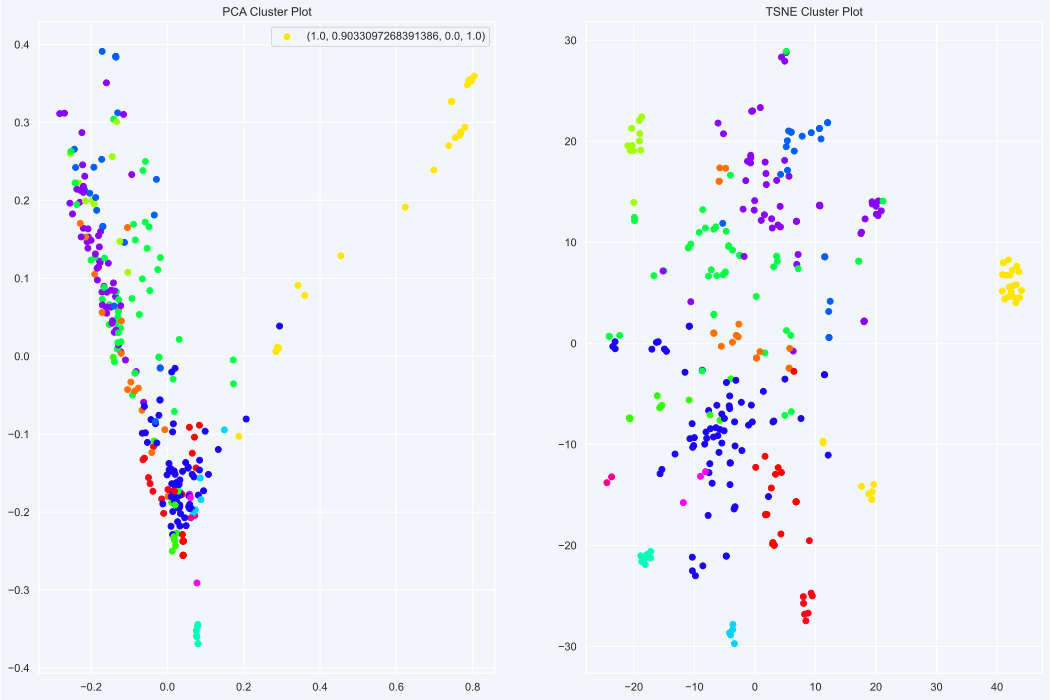

In [115]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=500, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(18, 12))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    ax[0].legend(label_subset)
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X_tfidf, clusters)

In [116]:
kmeans = KMeans(n_clusters = 14, n_init = 5)
kmeans.fit(X_tfidf)

KMeans(n_clusters=14, n_init=5)

In [117]:
words = word_vectorizer.get_feature_names()

In [118]:
df['Team_kmeans'] = kmeans.labels_

In [119]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : ready, feel, long, travel, technical, together ready, beauty discover, culture endure, world wait, endure
1 : ux, user, designer, design, research, craft, demonstrates, user experience, product design, copy
2 : love, help people, go, love help, transport, focus mental, free support, perkbox competitive, core value, home wellbeing
3 : com bv, bv, value partner, partner need, win, conversation, account, behavior, driver, hotel
4 : latency, reliability, automation, infrastructure, sre, deploy, system, solid, growth system, deploy 1000
5 : phone, manage portfolio, com business, portfolio, answer, account executive, benefit usage, ability analytical, contact answer, service escalation
6 : app, developer, technical, io, test, feature, android, technology, contribute, process
7 : recruiting, recruiter, hire, talent, hire manager, candidate, source, talent acquisition, search, acquisition
8 : holiday, quality solution, good understand, transport, tdd, continuous, continuous delivery, bdd, 

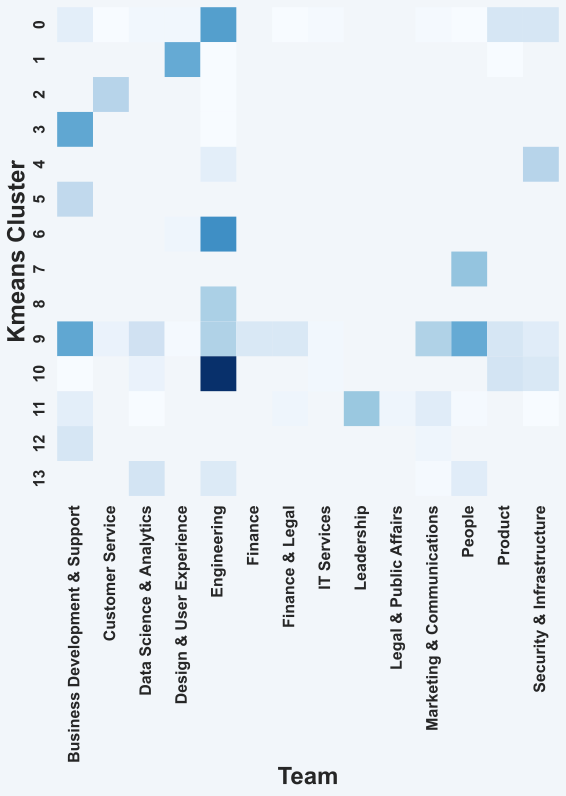

In [120]:
clusters = df.groupby(['Team_kmeans', 'Team']).size()
fig2, ax2 = plt.subplots(figsize = (9, 9))
sns.heatmap(clusters.unstack(level = 'Team'), ax = ax2, cbar=False, cmap = 'Blues')

ax2.set_xlabel('Team', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('Kmeans Cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight('bold')
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight('bold')

# Kmeans clusters

In [122]:
def get_top_keywords(data, clusters, labels, n_terms):
    df_k = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df_k.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X_tfidf, clusters, word_vectorizer.get_feature_names(), 10)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

***